<a href="https://colab.research.google.com/github/vicensi/Deep-learning/blob/main/VALE3_CNN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from datetime import datetime
import plotly.graph_objs as go

In [ ]:
%cd /content/drive/MyDrive/Pasta sem nome/deep learnig/VALE3.SA-20240512T195756Z-001/VALE3.SA/imagens/teste
!mv -r comprar/* vender/

/content/drive/MyDrive/Pasta sem nome/deep learnig/VALE3.SA-20240512T195756Z-001/VALE3.SA/imagens/teste


In [ ]:
%cd /content/drive/MyDrive/Pasta sem nome/deep learnig/VALE3.SA-20240512T195756Z-001/VALE3.SA/imagens/treino
!mv -r comprar/* vender/

In [ ]:
# as imagens de vender e comprar foram unificada na pasta vender
! ls vender

2019-02-26_1.png   2020-02-14_-1.png  2021-02-08_-1.png  2022-01-27_1.png   2023-01-13_1.png
2019-02-27_1.png   2020-02-17_-1.png  2021-02-09_1.png	 2022-01-28_1.png   2023-01-16_1.png
2019-02-28_1.png   2020-02-18_-1.png  2021-02-10_1.png	 2022-01-31_-1.png  2023-01-17_1.png
2019-03-01_1.png   2020-02-19_1.png   2021-02-11_1.png	 2022-02-01_-1.png  2023-01-18_1.png
2019-03-06_1.png   2020-02-20_-1.png  2021-02-12_1.png	 2022-02-02_-1.png  2023-01-19_1.png
2019-03-07_1.png   2020-02-21_-1.png  2021-02-17_1.png	 2022-02-03_1.png   2023-01-20_1.png
2019-03-08_1.png   2020-02-26_-1.png  2021-02-18_1.png	 2022-02-04_1.png   2023-01-23_1.png
2019-03-11_1.png   2020-02-27_-1.png  2021-02-19_1.png	 2022-02-07_1.png   2023-01-24_1.png
2019-03-12_1.png   2020-02-28_-1.png  2021-02-22_1.png	 2022-02-08_1.png   2023-01-25_1.png
2019-03-13_1.png   2020-03-02_-1.png  2021-02-23_1.png	 2022-02-09_1.png   2023-01-26_1.png
2019-03-14_1.png   2020-03-03_-1.png  2021-02-24_1.png	 2022-02-10_1.png   2023

In [ ]:

def load_images_from_folder(folder, target_size=(32, 32)):
    images = []
    labels = []

    # Lista de arquivos no diretório
    filenames = [f for f in os.listdir(folder) if f.endswith('.png')]

  # Ordena a lista de arquivos usando a data no nome do arquivo
    filenames = sorted(filenames, key=lambda x: datetime.strptime(x.split('_')[0], '%Y-%m-%d'))


    for filename in filenames:
        img = load_img(os.path.join(folder, filename), target_size=target_size, color_mode='grayscale')
        img_array = img_to_array(img)
        images.append(img_array)
        label = int(filename.split('_')[1].split('.png')[0])  # Extrai o label como número inteiro
        labels.append(label)

    return np.array(images), np.array(labels)

X_test, y_test = load_images_from_folder('/content/drive/MyDrive/Pasta sem nome/deep learnig/VALE3.SA-20240512T195756Z-001/VALE3.SA/imagens/teste/vender')


In [ ]:

def load_images_from_folder(folder, target_size=(32, 32)):
    images = []
    labels = []

    # Lista de arquivos no diretório
    filenames = [f for f in os.listdir(folder) if f.endswith('.png')]

  # Ordena a lista de arquivos usando a data no nome do arquivo
    filenames = sorted(filenames, key=lambda x: datetime.strptime(x.split('_')[0], '%Y-%m-%d'))


    for filename in filenames:
        img = load_img(os.path.join(folder, filename), target_size=target_size, color_mode='grayscale')
        img_array = img_to_array(img)
        images.append(img_array)
        label = int(filename.split('_')[1].split('.png')[0])  # Extrai o label como número inteiro
        labels.append(label)

    return np.array(images), np.array(labels)

X_train, y_train = load_images_from_folder('/content/drive/MyDrive/Pasta sem nome/deep learnig/VALE3.SA-20240512T195756Z-001/VALE3.SA/imagens/treino/vender')


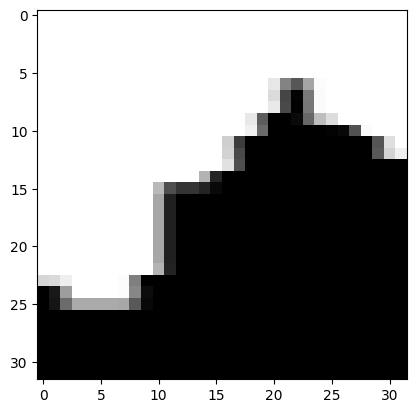

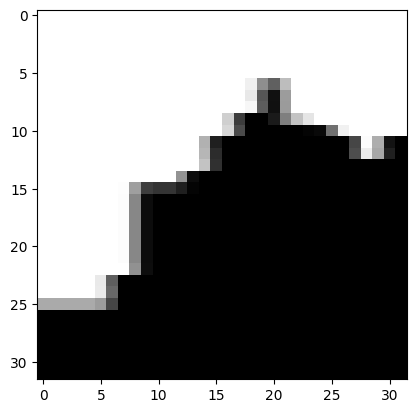

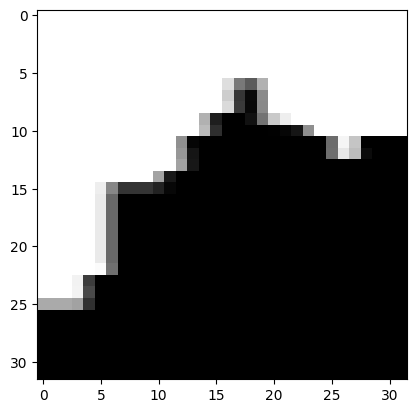

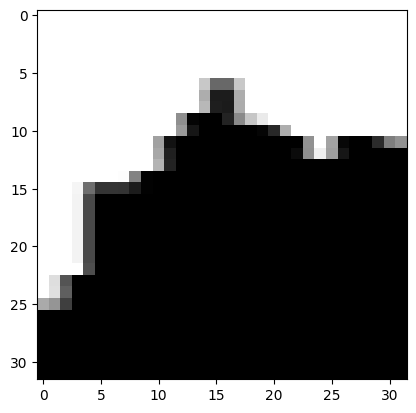

In [ ]:
for i in range(0,4):
    image = X_train[i]
    plt.imshow(image[:,:,0], cmap=plt.get_cmap('gray'))
    plt.show()

In [ ]:
# Criação do OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Ajustar no conjunto de treino e transformar os labels de treino e teste
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Construir o modelo CNN para classificação
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_encoded, epochs=38, batch_size=32, validation_split=0.2)

Epoch 1/38
121/121 [==============================] - 6s 14ms/step - loss: 1.2224 - accuracy: 0.7467 - val_loss: 0.3955 - val_accuracy: 0.8181
Epoch 2/38
121/121 [==============================] - 1s 6ms/step - loss: 0.4098 - accuracy: 0.8149 - val_loss: 0.3519 - val_accuracy: 0.8295
Epoch 3/38
121/121 [==============================] - 1s 6ms/step - loss: 0.3501 - accuracy: 0.8489 - val_loss: 0.3436 - val_accuracy: 0.8451
Epoch 4/38
121/121 [==============================] - 1s 6ms/step - loss: 0.3070 - accuracy: 0.8669 - val_loss: 0.3021 - val_accuracy: 0.8628
Epoch 5/38
121/121 [==============================] - 1s 5ms/step - loss: 0.2796 - accuracy: 0.8778 - val_loss: 0.3055 - val_accuracy: 0.8617
Epoch 6/38
121/121 [==============================] - 1s 5ms/step - loss: 0.2577 - accuracy: 0.8929 - val_loss: 0.2869 - val_accuracy: 0.8711
Epoch 7/38
121/121 [==============================] - 1s 5ms/step - loss: 0.2423 - accuracy: 0.8918 - val_loss: 0.2892 - val_accuracy: 0.8753
Epoch

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Model Accuracy: {accuracy*100:.2f}%')

38/38 [==============================] - 0s 7ms/step - loss: 1.2237 - accuracy: 0.8446
Model Accuracy: 84.46%


38/38 [==============================] - 0s 3ms/step - loss: 1.2237 - accuracy: 0.8446
Model Accuracy: 84.46%
38/38 [==============================] - 0s 2ms/step


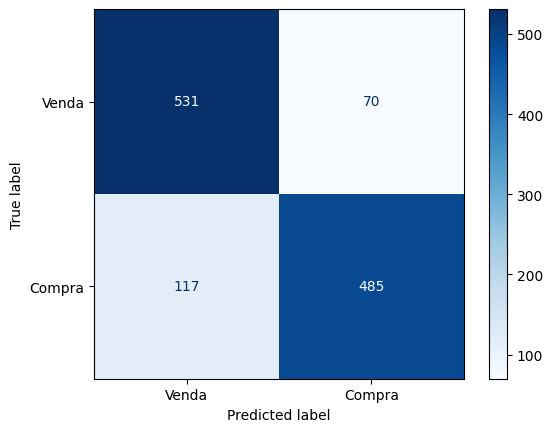

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Avaliação do Modelo
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Model Accuracy: {accuracy*100:.2f}%')

# Predição
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test_encoded, axis=1)

# Calcular a matriz de confusão
cm = confusion_matrix(true_labels, predicted_labels)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Venda', 'Compra'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Criando grafico

In [ ]:
# Caminho da pasta no Google Drive
pasta = '/content/drive/MyDrive/Pasta sem nome/deep learnig/VALE3.SA-20240512T195756Z-001/VALE3.SA/imagens/teste/vender'

# Listando todos os arquivos na pasta
arquivos = [f for f in os.listdir(pasta) if os.path.isfile(os.path.join(pasta, f))]

# Inicializando listas para armazenar as datas e os labels
datas = []
labels = []

# Processando cada arquivo para extrair a data e o label
for arquivo in arquivos:
    # Dividindo o nome do arquivo para extrair a data e o label
    partes = arquivo.split('_')
    data = partes[0]
    label = partes[1].split('.')[0]  # Removendo a extensão do arquivo

    # Adicionando os valores às listas
    datas.append(data)
    labels.append(label)

# Criando o DataFrame
df = pd.DataFrame({'Date': datas, 'Label': labels})


In [ ]:
# Ordenar o DataFrame pela coluna 'date'
df_sorted = df.sort_values(by='Date')
df_sorted = df_sorted.reset_index(drop=True)
df_sorted

,Date,Label
0,2019-02-26,1
1,2019-02-27,1
2,2019-02-28,1
3,2019-03-01,1
4,2019-03-06,1
...,...,...
1198,2023-12-21,1
1199,2023-12-22,1
1200,2023-12-26,1
1201,2023-12-27,1


In [ ]:
df_sorted['Label'] = df_sorted['Label'].replace(-1, 0)


In [ ]:
dataframe_teste = read_csv('/content/drive/MyDrive/Pasta sem nome/deep learnig/VALE3.SA-20240512T195756Z-001/VALE3.SA/teste.csv', usecols =[3,4], engine='python')
dataframe_teste.head(150)

,Smoothed_Close,Label
0,31.573791,1
1,31.610830,1
2,31.662583,1
3,31.684603,1
4,31.793780,1
...,...,...
145,32.455205,-1
146,32.474361,-1
147,32.477960,1
148,32.487338,1


In [ ]:
dataframe_teste.rename(columns={'Label': 'Label_Original'}, inplace = True)

In [ ]:
dataframe_teste['Label_Original'] = dataframe_teste['Label_Original'].replace(-1, 0)

In [ ]:
# Concatenando os DataFrames
df_concatenado = pd.concat([df_sorted, dataframe_teste],axis=1)

In [ ]:
df_concatenado

,Date,Label,Smoothed_Close,Label_Original
0,2019-02-26,1,31.573791,1
1,2019-02-27,1,31.610830,1
2,2019-02-28,1,31.662583,1
3,2019-03-01,1,31.684603,1
4,2019-03-06,1,31.793780,1
...,...,...,...,...
1198,2023-12-21,1,73.724733,1
1199,2023-12-22,1,73.991260,1
1200,2023-12-26,1,74.258134,1
1201,2023-12-27,1,74.572321,1


In [ ]:
# Implementar estratégia de compra e venda
def backtest(data, predictions):
    capital = 1000  # Capital inicial
    acoes = 0  # Quantidade de ações em posse
    capital_hist = [capital]  # Histórico do capital ao longo do tempo
    real_values = []  # Valores reais das ações ao longo do tempo
    predictions_values = []  # Previsões de compra e venda ao longo do tempo

    for index, row in data.iterrows():
        if predictions[index] == 1:
            acoes += capital / row['Smoothed_Close']
            capital = 0
        elif predictions[index] == 0:
            capital += acoes * row['Smoothed_Close']
            acoes = 0

        capital_hist.append(capital + acoes * row['Smoothed_Close'])
        real_values.append(row['Smoothed_Close'])
        predictions_values.append(predictions[index])

    return capital_hist, real_values, predictions_values

historico_capital, real_values, predictions_values = backtest(df_concatenado, predicted_labels)


In [ ]:
historico_capital = np.array(historico_capital)
historico_capital

array([1000.        , 1000.        , 1001.17309322, ..., 7549.01009505,
       7580.9500135 , 7607.66271292])

In [ ]:
Smoothed_Close = df_concatenado.Smoothed_Close.values
Smoothed_Close

array([31.57379143, 31.61083044, 31.6625827 , ..., 74.25813428,
       74.57232101, 74.8350886 ])

In [ ]:
Smoothed_Close.shape

(1203,)

In [ ]:
Date = df_concatenado.Date.values
Date

array(['2019-02-26', '2019-02-27', '2019-02-28', ..., '2023-12-26',
       '2023-12-27', '2023-12-28'], dtype=object)

In [ ]:
Label_Original = df_concatenado.Label_Original.values
Label_Original

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#criado um array com os label original
buy_signals_original = np.full(len(Label_Original), np.nan)
sell_signals_original = np.full(len(Label_Original), np.nan)

# Preencher os arrays de compra e venda com base nos sinais
for i in range(len(Label_Original)):
    if Label_Original[i] == '1':
        buy_signals_original[i] = Smoothed_Close[i]
    elif Label_Original[i] == '-1':
        sell_signals_original[i] = Smoothed_Close[i]

In [ ]:
#criado um array com os label previstos
buy_signals_previsto = np.full(len(predicted_labels), np.nan)
sell_signals_previsto = np.full(len(predicted_labels), np.nan)

# Preencher os arrays de compra e venda com base nos sinais
for i in range(len(predicted_labels)):
    if predicted_labels[i] == 1:
        buy_signals_previsto[i] = Smoothed_Close[i]
    elif predicted_labels[i] == 0:
        sell_signals_previsto[i] = Smoothed_Close[i]

In [ ]:
#CODIgo para o plotly

fig = go.Figure()

# Criar o gráfico da série temporal
fig = go.Figure()

# Adicionar a linha de valor de fechamento
fig.add_trace(go.Scatter(x=Date, y=Smoothed_Close, mode='lines', name='Closed Value'))

# original
# Adicionar pontos de compra
fig.add_trace(go.Scatter(x=Date, y=buy_signals_original, mode='markers', name='Buy Signal', marker=dict(color='green', size=8, symbol='triangle-up')))
# Adicionar pontos de venda
fig.add_trace(go.Scatter(x=Date, y=sell_signals_original, mode='markers', name='Sell Signal', marker=dict(color='red', size=8, symbol='triangle-down')))


# Previsto
# Adicionar pontos de compra
fig.add_trace(go.Scatter(x=Date, y=buy_signals_previsto, mode='markers', name='Buy Signal previsto', marker=dict(color='yellow', size=8, symbol='triangle-up')))

# Adicionar pontos de venda
fig.add_trace(go.Scatter(x=Date, y=sell_signals_previsto, mode='markers', name='Sell Signal previsto', marker=dict(color='pink', size=8, symbol='triangle-down')))

# valor
fig.add_trace(go.Scatter(x=Date, y=historico_capital, mode='lines', name='Capital ao longo do tempo',yaxis='y2'))


# Configurar layout para usar dois eixos y
fig.update_layout(
    title='Desempenho do modelo via backtest',
    xaxis_title='Período',
    yaxis=dict(
        title='Valor do Ativo',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Capital',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.0)
)

fig.show()